# Presentation: MLQC 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import utils
import os

## Data Sources
**====================================================================================================================**
We will be working with tidal station gauge data from **NOAA's National Ocean Service CO-OPS** office, i.e. the Tides & Currents people. It contains information on the mean water level, standard deviations, the tidal predictions, and secondary sensor measurements recorded every **6 minutes**. Additionally, the data has been initially Quality-Controlled (QC'ed) following **QARTOD**. The data comes from the following stations along the Atlantic Coast of the US:
1. Portland, ME
2. Boston, MA
3. Atlantic City, NJ
4. Cape May, NJ
5. Lewes, DE


In [2]:
lat = [43.6567, 42.3539, 39.3550,38.9678,38.7828]
lon = [-70.2467,-71.0503,-74.4183,-74.9597,-75.1192]
names = ['Portland, ME','Boston, MA','Atlantic City, NJ','Cape May, NJ','Lewes, DE']

m = folium.Map(location=[np.mean(lat),np.mean(lon)],tiles='Stamen Terrain',zoom_start=6)
for x,y,n in zip(lat,lon,names):
    folium.Marker(location=[x, y], popup=n).add_to(m)
m

## Data Exploration
**====================================================================================================================**

First, we need to import the data, which is stored on data buckets on Google cloud:

        gs://ohw_example/mlqcfortimeseries/8418150_portland_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8443970_boston_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8534720_ac_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8536110_cm_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8557380_lewes_raw_ver_merged_wl.csv
        

In [3]:
# Read in the data
dataIn = utils.readInWL('gs://ohw_example/mlqcfortimeseries/8536110_cm_raw_ver_merged_wl.csv')

/home/andrew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4,5,8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Each dataset contains the following fields:
1. Primary = the measurement from the primary sensor
2. Sigma = the standard deviation of the water level
3. Backup = a secondary sensor of the water level
4. Verified = manually QC'ed data
5. Prediction = the predicted water level for the station based on NOAA's tide predictions (note this is NOT the predictions from any machine learning model).

In [19]:
# Clean the data
data = utils.initial_data_prep(data)
data = utils.remove_extra_datapoints(data,suppress_fig=True)

In [23]:
data_cleaned.set_index('time',inplace=True)

Text(0.5, 0, 'Time')

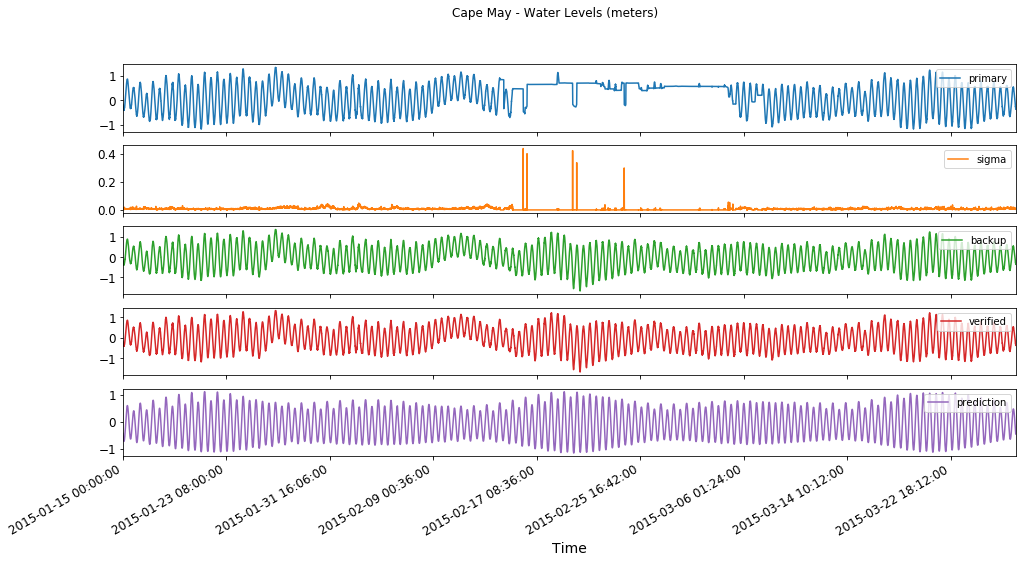

In [26]:
ax = data_cleaned.loc['2015-01-15 00:00:00':'2015-03-28 00:00:00'].plot(subplots=True, 
                                                                        figsize=(16, 8),
                                                                        title='Cape May - Water Levels (meters)',
                                                                        fontsize='12')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[3].legend(loc='upper right')
ax[4].legend(loc='upper right')
ax[4].set_xlabel('Time',fontsize='14')

## Train-Test Splitting
Next, we need to grab data to train the models, and set aside data to test the models. 
* Targets = Checks if the primary sensor data matches the verified (manually QC'ed) data. Returns a logical bit-mask.
* Features = The values used as input into the model. Inc

In [ ]:
data_targets = utils.findTarget(data_cleaned)
data_features = utils.findFeatures(data_cleaned)

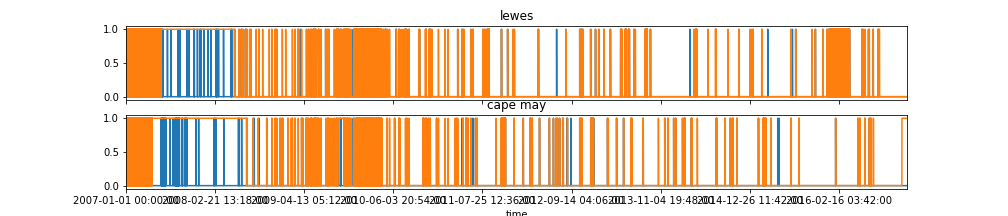

## Machine Learning Approaches for QC
### Sklearn

In [14]:
cleaned = pd.read_pickle("pickle_files/8536110_cm_raw_ver_merged_wl_Cleaned.p")
targets = pd.read_pickle("pickle_files/8536110_cm_raw_ver_merged_wl_Target.p")
features = pd.read_pickle("pickle_files/8536110_cm_raw_ver_merged_wl_Features.p")

In [15]:
cleaned.head()

,time,primary,sigma,backup,verified,prediction
0,2007-01-01 00:00:00,0.459,0.006,0.446,0.459,0.385
1,2007-01-01 00:06:00,0.437,0.005,0.425,0.437,0.365
2,2007-01-01 00:12:00,0.400,0.006,0.388,0.400,0.344
3,2007-01-01 00:18:00,0.376,0.006,0.363,0.376,0.321
4,2007-01-01 00:24:00,0.354,0.006,0.342,0.354,0.297


### Results Using Keras:

Below we show the training history of using a Neural Network from the KERAS package:

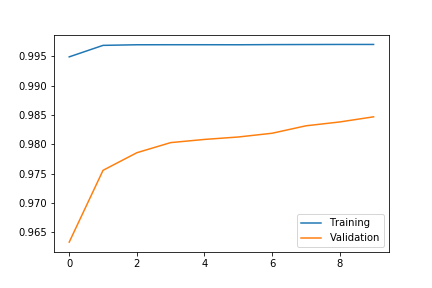

And below is the results, where the more yellow the dot shows the likelihood that a measurement is bad. Noteably, this does use standard statistical logic (such as from an ARIMA model) which would only identify normal statistical outliers.

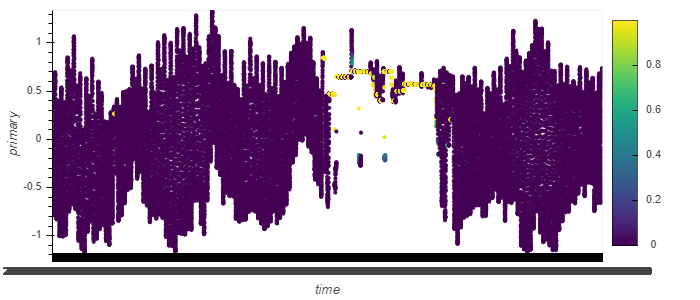